we'll be implementing xor using 2 layer neural network

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
x=x.T

In [3]:
y=np.array([0,1,1,0])

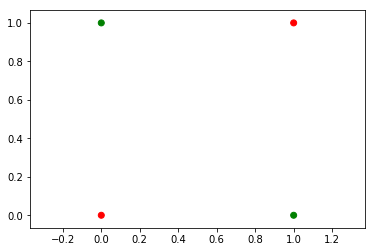

In [4]:
c=['green' if l==1 else 'red' for l in y]
plt.scatter(x[0],x[1],color=c)
plt.axis('equal')
plt.show()

In [5]:
def cost(a,y):
    j=(-1/len(y))*np.sum(y*np.log(a)+(1-y)*np.log(1-a))
    return j

In [6]:
def sigmoid(x):
    a=1/(1+np.exp(-1*x))
    return a

In [7]:
np.random.seed(1)

In [8]:
w1=np.random.rand(2,2)*2-1
w2=np.random.rand(1,2)*2-1
b1=np.random.rand(2,1)*2-1
b2=np.random.rand(1,1)*2-1

In [9]:
w1

array([[-0.16595599,  0.44064899],
       [-0.99977125, -0.39533485]])

In [10]:
j_history=np.zeros((1000000,1))
alpha=0.01

In [11]:
for i in range(1000000):
    #forward propagation
    z1=np.dot(w1,x)+b1
    a1=np.tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=sigmoid(z2)
    
    #computing cost
    j=cost(a2,y)
    j_history[i]=j
    
    #backward propagation
    dz2=a2-y
    dw2=(1/len(y))*np.dot(dz2,a1.T)
    db2=(1/len(y))*np.sum(dz2, axis=1, keepdims=True)
    dz1=np.dot(w2.T,dz2)*(1-a1*a1)
    dw1=(1/len(y))*np.dot(dz1,x.T)
    db1=(1/len(y))*np.sum(dz1, axis=1, keepdims=True)
    
    #gradient descent
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2

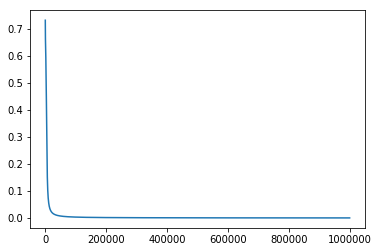

In [12]:
xa=np.arange(1,1000001,1)
plt.plot(xa,j_history)
plt.show()

In [13]:
b1

array([[-5.35197392],
       [ 2.09764988]])

In [14]:
x_t=[[0],[0]]

In [15]:
z1=np.dot(w1,x_t)+b1
a1=np.tanh(z1)
z2=np.dot(w2,a1)+b2
a2=sigmoid(z2)

In [16]:
a2

array([[ 0.00040028]])

In [17]:
j_history[-1]

array([ 0.00030743])